<a href="https://colab.research.google.com/github/tchild1/Football-ML/blob/main/PCA_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer

In [47]:
def fit_and_predict(X_train, y_train, X_test, y_test, linReg):
  linReg.fit(X_train, y_train)
  train_score = linReg.score(X_train, y_train)
  test_score = linReg.score(X_test, y_test)
  train_mae = mean_absolute_error(y_train, linReg.predict(X_train))
  test_mae = mean_absolute_error(y_test, linReg.predict(X_test))
  model_coef = linReg.coef_
  print(f"Model Coefficients: {model_coef}")
  print(f"Train Score: {train_score}")
  print(f"Test Score: {test_score}")
  print(f"Train MAE: {train_mae}")
  print(f"Test MAE: {test_mae}")
  return (test_score, test_mae)

In [48]:
games_df = pd.read_csv('cleanedCompiledData (1).csv')

q1_columns = games_df.filter(regex='q1$')
q1_q2_columns = games_df.filter(regex='q[12]$')
q1_q2_q3_columns = games_df.filter(regex='q[123]$')
q1_q2_q3_q4_columns = games_df.filter(regex='q[1234]$')

y = games_df['points']

In [49]:
X = games_df.drop(columns=['points'])

# Standardizing the data
scaler = StandardScaler()
X_Q1 = scaler.fit_transform(q1_columns)
X_Q12 = scaler.fit_transform(q1_q2_columns)
X_Q123 = scaler.fit_transform(q1_q2_q3_columns)
X_Q1234 = scaler.fit_transform(q1_q2_q3_q4_columns)

results = {}

In [50]:
resultsQ1 = {}
pcaComps = [3, 6, 9, 12]
varianceQ1 = {}

for i in pcaComps:
  pca = PCA(n_components=i)  # Adjust n_components to capture enough variance
  X_pca_Q1 = pca.fit_transform(X_Q1)

  # Variance explained by each component
  print(f"Number of Components: {i}")
  print("Explained variance ratio:", pca.explained_variance_ratio_)
  print("Cumulative variance ratio:", sum(pca.explained_variance_ratio_))
  print()
  varianceQ1[i] = sum(pca.explained_variance_ratio_)

  X_train, X_test, y_train, y_test = train_test_split(X_pca_Q1, y, test_size=0.2)
  reg = LinearRegression().fit(X_train, y_train)
  linReg = LinearRegression()
  resultsQ1[i] = fit_and_predict(X_train, y_train, X_test, y_test, linReg)
  print()


X_train, X_test, y_train, y_test = train_test_split(q1_columns, y, test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)
linReg = LinearRegression()
results["Q1"] = fit_and_predict(X_train, y_train, X_test, y_test, linReg)

Number of Components: 3
Explained variance ratio: [0.21792167 0.11999652 0.09643471]
Cumulative variance ratio: 0.43435289893125084

Model Coefficients: [ 1.54856856 -1.47165792  0.61663212]
Train Score: 0.14058312691375363
Test Score: 0.1291770150813405
Train MAE: 7.635448000079239
Test MAE: 7.937483286396989

Number of Components: 6
Explained variance ratio: [0.21792167 0.11999652 0.09643471 0.0822548  0.06552356 0.06438021]
Cumulative variance ratio: 0.646511476292012

Model Coefficients: [ 1.51413022 -1.55084641  0.72686354 -0.87946119  0.50990546  0.06951827]
Train Score: 0.15561945805974664
Test Score: 0.13334040950147208
Train MAE: 7.659383131017144
Test MAE: 7.546333961893265

Number of Components: 9
Explained variance ratio: [0.21792167 0.11999652 0.09643471 0.0822548  0.06552356 0.06438021
 0.06115008 0.05567091 0.05359856]
Cumulative variance ratio: 0.8169310332037129

Model Coefficients: [ 1.57193102 -1.50372979  0.7139255  -0.95460933  0.62169589 -0.05895905
  0.39409412 -

In [51]:
resultsQ12 = {}
pcaComps = [3, 6, 9, 12, 15, 18, 21]
varianceQ12 = {}

for i in pcaComps:
  pca = PCA(n_components=i)  # Adjust n_components to capture enough variance
  X_pca_Q12 = pca.fit_transform(X_Q12)

  # Variance explained by each component
  print(f"Number of Components: {i}")
  print("Explained variance ratio:", pca.explained_variance_ratio_)
  print("Cumulative variance ratio:", sum(pca.explained_variance_ratio_))
  print()
  varianceQ12[i] = sum(pca.explained_variance_ratio_)

  X_train, X_test, y_train, y_test = train_test_split(X_pca_Q12, y, test_size=0.2)
  reg = LinearRegression().fit(X_train, y_train)
  linReg = LinearRegression()
  resultsQ12[i] = fit_and_predict(X_train, y_train, X_test, y_test, linReg)
  print()


X_train, X_test, y_train, y_test = train_test_split(q1_q2_columns, y, test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)
linReg = LinearRegression()
results["Q2"] = fit_and_predict(X_train, y_train, X_test, y_test, linReg)

Number of Components: 3
Explained variance ratio: [0.11009248 0.10295002 0.06454326]
Cumulative variance ratio: 0.2775857552335029

Model Coefficients: [ 1.97777946  1.22610398 -1.66937203]
Train Score: 0.2597938396008075
Test Score: 0.23321770245594153
Train MAE: 7.04793798946011
Test MAE: 7.384734706680567

Number of Components: 6
Explained variance ratio: [0.11009248 0.10295002 0.06454326 0.05627823 0.04946073 0.04711867]
Cumulative variance ratio: 0.43044339192345854

Model Coefficients: [ 1.90939093  1.24205584 -1.71801185  0.0941835   0.86653287  0.41806291]
Train Score: 0.26988068271491583
Test Score: 0.25645065384840393
Train MAE: 7.0270041379094215
Test MAE: 7.235360020275896

Number of Components: 9
Explained variance ratio: [0.11009248 0.10295002 0.06454326 0.05627823 0.04946073 0.04711867
 0.04294155 0.04063924 0.03566476]
Cumulative variance ratio: 0.5496889332005799

Model Coefficients: [ 1.85908879  1.16957178 -1.71528907  0.05142211  0.79344283  0.35995303
  0.84616512 

In [52]:
resultsQ123 = {}
pcaComps = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
varianceQ123 = {}

for i in pcaComps:
  pca = PCA(n_components=i)  # Adjust n_components to capture enough variance
  X_pca_Q123 = pca.fit_transform(X_Q123)

  # Variance explained by each component
  print(f"Number of Components: {i}")
  print("Explained variance ratio:", pca.explained_variance_ratio_)
  print("Cumulative variance ratio:", sum(pca.explained_variance_ratio_))
  print()
  varianceQ123[i] = sum(pca.explained_variance_ratio_)

  X_train, X_test, y_train, y_test = train_test_split(X_pca_Q123, y, test_size=0.2)
  reg = LinearRegression().fit(X_train, y_train)
  linReg = LinearRegression()
  resultsQ123[i] = fit_and_predict(X_train, y_train, X_test, y_test, linReg)
  print()


X_train, X_test, y_train, y_test = train_test_split(q1_q2_q3_columns, y, test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)
linReg = LinearRegression()
results["Q3"] = fit_and_predict(X_train, y_train, X_test, y_test, linReg)

Number of Components: 3
Explained variance ratio: [0.07544558 0.07202209 0.0654304 ]
Cumulative variance ratio: 0.21289807101170619

Model Coefficients: [1.62615233 2.14643033 0.45023832]
Train Score: 0.2763704998502291
Test Score: 0.2530979041886995
Train MAE: 6.979620723722609
Test MAE: 7.235389302042512

Number of Components: 6
Explained variance ratio: [0.07544558 0.07202209 0.0654304  0.04445102 0.03991039 0.0367372 ]
Cumulative variance ratio: 0.33399667954225104

Model Coefficients: [ 1.5887617   2.16999166  0.40843029 -1.65165899  0.18475476  0.12083966]
Train Score: 0.3366087858320592
Test Score: 0.3351971163080929
Train MAE: 6.696290145903609
Test MAE: 6.800756997201089

Number of Components: 9
Explained variance ratio: [0.07544558 0.07202209 0.0654304  0.04445102 0.03991039 0.0367372
 0.0357251  0.0320478  0.03059157]
Cumulative variance ratio: 0.43236115129615843

Model Coefficients: [ 1.60938677  2.10200846  0.44619866 -1.68929578  0.10507962  0.21663577
  1.00068276 -0.44

In [53]:
resultsQ1234 = {}
varianceQ1234 = {}
pcaCompsQ4 = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39]

for i in pcaComps:
  pca = PCA(n_components=i)  # Adjust n_components to capture enough variance
  X_pca_Q1234 = pca.fit_transform(X_Q1234)

  # Variance explained by each component
  print(f"Number of Components: {i}")
  print("Explained variance ratio:", pca.explained_variance_ratio_)
  print("Cumulative variance ratio:", sum(pca.explained_variance_ratio_))
  print()
  varianceQ1234[i] = sum(pca.explained_variance_ratio_)

  X_train, X_test, y_train, y_test = train_test_split(X_pca_Q1234, y, test_size=0.2)
  reg = LinearRegression().fit(X_train, y_train)
  linReg = LinearRegression()
  resultsQ1234[i] = fit_and_predict(X_train, y_train, X_test, y_test, linReg)
  print()


X_train, X_test, y_train, y_test = train_test_split(q1_q2_q3_q4_columns, y, test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)
linReg = LinearRegression()
results["Q4"] = fit_and_predict(X_train, y_train, X_test, y_test, linReg)

Number of Components: 3
Explained variance ratio: [0.06810438 0.05527377 0.04921449]
Cumulative variance ratio: 0.17259263670119843

Model Coefficients: [-1.96649037  0.65465376  0.55236578]
Train Score: 0.2031359025363242
Test Score: 0.21264783666259568
Train MAE: 7.341366439241552
Test MAE: 7.334854993637926

Number of Components: 6
Explained variance ratio: [0.06810438 0.05527377 0.04921449 0.04731132 0.03414296 0.02995736]
Cumulative variance ratio: 0.284004277892346

Model Coefficients: [-1.99633109  0.60191923  0.52570184  1.82082237 -2.07262423 -0.38762342]
Train Score: 0.41694556233204616
Test Score: 0.39255641227129
Train MAE: 6.270157741434505
Test MAE: 6.397527705996101

Number of Components: 9
Explained variance ratio: [0.06810438 0.05527377 0.04921449 0.04731132 0.03414296 0.02995736
 0.02926112 0.02779786 0.02752449]
Cumulative variance ratio: 0.3685877509964558

Model Coefficients: [-1.99454911  0.64425848  0.60701547  1.78810933 -2.06540933 -0.41239155
  0.3290062   0.8

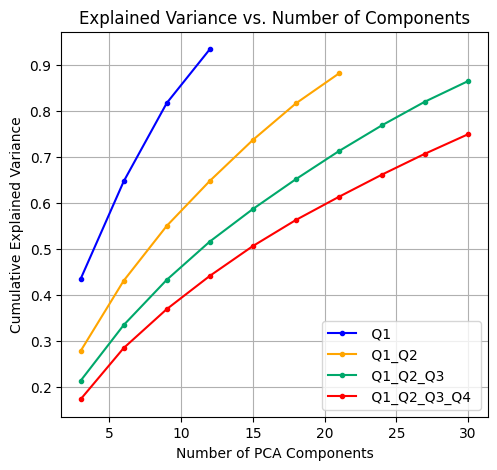

In [93]:
variance = [varianceQ1, varianceQ12, varianceQ123, varianceQ1234]
resultsAll = [resultsQ1, resultsQ12, resultsQ123, resultsQ1234]
quarters = ["Q1", "Q1_Q2", "Q1_Q2_Q3", "Q1_Q2_Q3_Q4"]
comps = []
cms = []

for i in range(len(quarters)):
  components = list(variance[i].keys())
  explained_variance = list(variance[i].values())
  comps.append(explained_variance)
  cms.append(components)

# Plot cumulative explained variance
plt.figure(figsize=(5.5, 5))
plt.plot(cms[0], comps[0], marker='.', linestyle='-', color='b', label=' Q1 ')
plt.plot(cms[1], comps[1], marker='.', linestyle='-', color='orange', label=' Q1_Q2 ')
plt.plot(cms[2], comps[2], marker='.', linestyle='-', color='#00A86B', label=' Q1_Q2_Q3 ')
plt.plot(cms[3], comps[3], marker='.', linestyle='-', color='r', label=' Q1_Q2_Q3_Q4 ')
plt.title(f"Explained Variance vs. Number of Components")
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.legend()
plt.show()

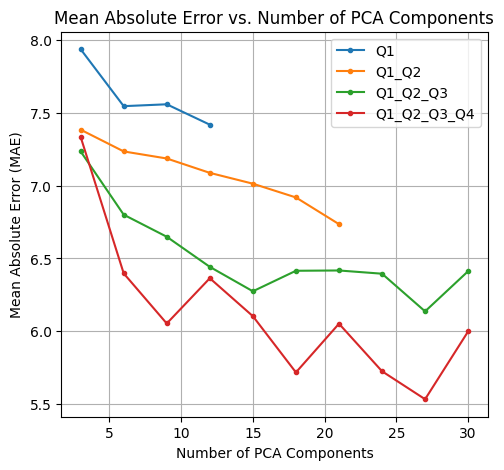

In [94]:
plt.figure(figsize=(5.5, 5))
for i, data_dict in enumerate(resultsAll):
    x = list(data_dict.keys())  # Number of PCA components
    y = [value[1] for value in data_dict.values()]  # Extract MAE
    plt.plot(x, y, marker='.', label=quarters[i])

# Customize the plot
plt.title('Mean Absolute Error vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.legend()
plt.show()

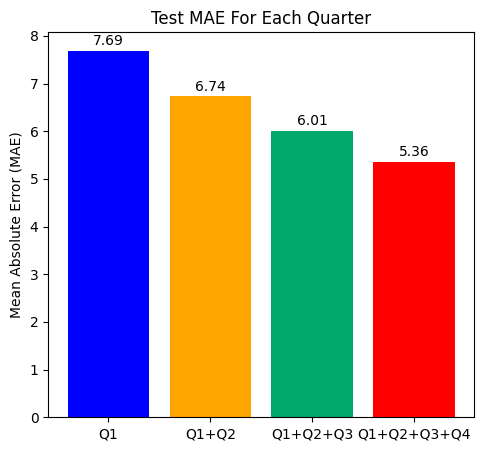

In [68]:
testAccuracys = [item[0] for item in results.values()]
testMae = [item[1] for item in results.values()]

colors = ['b', 'orange', '#00A86B', 'r']
quarters = ['Q1', 'Q1+Q2', 'Q1+Q2+Q3', 'Q1+Q2+Q3+Q4']


plt.figure(figsize=(5.5, 5))
plt.bar(quarters, testMae, color=colors)

# Add labels and title
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Test MAE For Each Quarter')

# Annotate each bar with its value
for i, score in enumerate(testMae):
    plt.text(i, score + 0.05, f'{round(score, 2)}', ha='center', va='bottom')

# Show the plot
plt.show()